In [1]:
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

import keras.layers as layers
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from time import time

In [2]:

train_data = np.genfromtxt('trainImage.csv', delimiter=',')
train_labels = np.genfromtxt('trainLabel.csv', delimiter=',')

test_data = np.genfromtxt('testImage.csv', delimiter=',')
test_labels = np.genfromtxt('testLabel.csv', delimiter=',')


In [6]:
train_reshaped = np.reshape(train_data ,(len(train_data), 28, 28, 1))
test_reshaped = np.reshape(test_data ,(len(test_data), 28, 28, 1))

#updating size to original lenet5 data
train_reshaped = np.pad(train_reshaped, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_reshaped = np.pad(test_reshaped, ((0,0),(2,2),(2,2),(0,0)), 'constant')

train_length = int(len(train_data) * 0.8)
train_labels = np_utils.to_categorical(train_labels, 10)
test_labels = np_utils.to_categorical(test_labels, 10)

X_train, y_train = train_reshaped[: train_length],  train_labels[: train_length]
X_validation, y_validation = train_reshaped[train_length : ],  train_labels[ train_length :]


print(len(X_train))
print(len(X_validation))

print(X_train[0].shape)
print(y_train[0])


48000
12000
(32, 32, 1)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


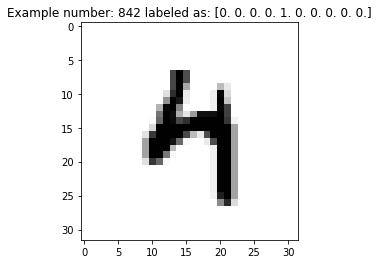

In [8]:
def display_image(position, data, labels):
    image = data[position].squeeze()
    plt.title('Example number: ' + str(position) + " labeled as: " + str(labels[position]))
    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.show()
    
display_image(842, X_train, y_train)

In [9]:

model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))

model.add(layers.Dense(units=10, activation = 'sigmoid'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
EPOCHS = 10
BATCH_SIZE = 128

train_generator = ImageDataGenerator().flow(X_train, y_train, batch_size=BATCH_SIZE)
validation_generator = ImageDataGenerator().flow(X_validation, y_validation, batch_size=BATCH_SIZE)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 6)         60        
_________________________________________________________________
average_pooling2d (AveragePo (None, 15, 15, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 16)        880       
_________________________________________________________________
average_pooling2d_1 (Average (None, 6, 6, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               69240     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [10]:
print('# of training images:', X_train.shape[0])
print('# of validation images:', X_validation.shape[0])

steps_per_epoch = X_train.shape[0]//BATCH_SIZE
validation_steps = X_validation.shape[0]//BATCH_SIZE

tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
model.fit_generator(train_generator, steps_per_epoch=steps_per_epoch, epochs=EPOCHS, 
                    validation_data=validation_generator, validation_steps=validation_steps,  
                    shuffle=True, callbacks=[tensorboard])
                    


...
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation))

# of training images: 48000
# of validation images: 12000
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
  1/375 [..............................] - ETA: 0s - loss: 5.1131 - accuracy: 0.0391WARNING:tensorflow:From c:\users\ata jadid ahari\pycharmprojects\stack\venv\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
375/375 [==============================] - 34s 90ms/step - loss: 0.7418 - accuracy: 0.4990 - val_loss: 0.0909 - val_accuracy: 0.9744
Epoch 2/10
375/375 [==============================] - 30s 81ms/step - loss: 0.0679 - accuracy: 0.9803 - val_loss: 0.0597 - val_accuracy: 0.9807
Epoch 3/10
375/375 [==============================] - 33s 87ms/step - loss: 0.0445 - accuracy: 0.9858 - val_loss: 0.0511 - val_accuracy: 0.9847
Epoch 4/10
375/375 [=====================

In [11]:
score = model.evaluate(test_reshaped, test_labels)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 4s 13ms/step - loss: 0.0713 - accuracy: 0.9800
Test loss: 0.07133772224187851
Test accuracy: 0.9800000190734863
